<a href="https://colab.research.google.com/github/Talizg03/weather/blob/main/30%2C1%2C25_isolationforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd


df = pd.read_csv("Train.csv")
#print(df.head())
df.head()

<ipython-input-2-15aa9abb70e0>:4: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Train.csv")


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   saledate                  401125 non-null  object 
 10  fiModelDesc               401125 non-null  object 
 11  fiBaseModel               401125 non-null  object 
 12  fiSecondaryDesc           263934 non-null  object 
 13  fiModelSeries             56908 non-null   o

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def train_model(X, y):
    # Preprocess the features (convert categorical columns to category codes)
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = X[col].astype('category')
        if X[col].dtype == 'category':
            X[col] = X[col].cat.codes

    # Return processed X and y
    return X, y



# Randomly sample half of the rows from the dataset
df_half_random = df.sample(frac=0.5, random_state=42)

# Separate features (X) and target (y) from the sampled DataFrame
X_half_random = df_half_random.drop(columns=['SalePrice', 'Steering_Controls', 'Differential_Type',
                                              'Travel_Controls', 'Blade_Type', 'Backhoe_Mounting',
                                              'Grouser_Type', 'auctioneerID', 'MachineHoursCurrentMeter'])  # Features
y_half_random = df_half_random['SalePrice']  # Target

# Preprocess the features (convert categorical columns to category codes)
X_half_random, y_half_random = train_model(X_half_random, y_half_random)

# Split the sampled half into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_half_random, y_half_random, test_size=0.2, random_state=42)

# Train the RandomForestRegressor model on the processed data
model = RandomForestRegressor(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate model performance using RMSE
train_rmse = mean_squared_error(y_train, y_train_pred) ** 0.5
test_rmse = mean_squared_error(y_test, y_test_pred) ** 0.5

# Print RMSE results
print("RMSE Baseline accuracy:", y_test.std())  # RMSE Baseline accuracy
print(f"Train: Root Mean Squared Error (RMSE): {train_rmse}")
print(f"Test: Root Mean Squared Error (RMSE): {test_rmse}")

# Evaluate the model (example: calculating the R^2 score)
print("Training R^2 Score:", model.score(X_train, y_train))
print("Testing R^2 Score:", model.score(X_test, y_test))


RMSE Baseline accuracy: 22878.88247012821
Train: Root Mean Squared Error (RMSE): 3744.1887437399237
Test: Root Mean Squared Error (RMSE): 9942.179340571158
Training R^2 Score: 0.9736160065010663
Testing R^2 Score: 0.811155475129528


# Isolation forest and RandomForest regression without delete col or rows

# for now- BEST RESULTS FOR RMSE TRAIN AND TEST

<ipython-input-15-261d0e6877ab>:9: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Train.csv")


Root Mean Squared Error (RMSE) on Train Data: 3465.907790109335
Root Mean Squared Error (RMSE) on Test Data: 9166.705086489732

Feature Importances (in %):
                     Feature  Importance
14               ProductSize   30.310163
5                   YearMade   22.502744
0                    SalesID    9.261127
1                  MachineID    3.764585
8                   saledate    3.702487
38            Coupler_System    3.503058
2                    ModelID    3.502044
11           fiSecondaryDesc    3.459240
15        fiProductClassDesc    3.075969
16                     state    2.245342
9                fiModelDesc    2.183361
10               fiBaseModel    2.007730
4               auctioneerID    1.824796
20                 Enclosure    1.552904
6   MachineHoursCurrentMeter    1.351352
31                Hydraulics    1.265708
12             fiModelSeries    0.518331
13         fiModelDescriptor    0.435962
36                 Tire_Size    0.421088
48                Blade_

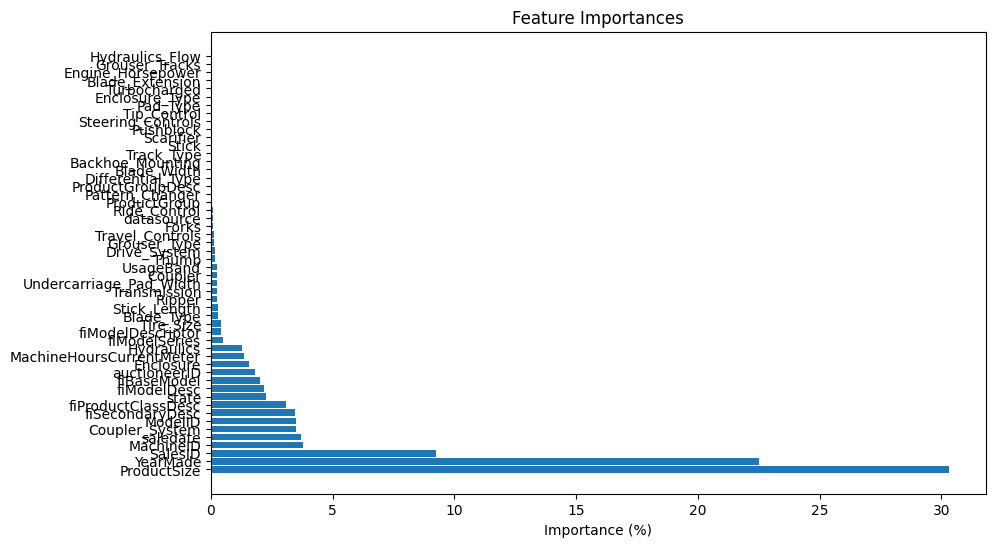

In [15]:
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np  # for sqrt function
import matplotlib.pyplot as plt  # for plotting

# Step 1: Upload the CSV file
df = pd.read_csv("Train.csv")



# Function to preprocess the data
def preprocess_data(X):
    # Convert categorical columns to category codes
    for col in X.columns:
        if X[col].dtype == 'object':  # If the column contains strings
            X[col] = X[col].astype('category')  # Convert to category type
        if X[col].dtype == 'category':  # If it's now a category dtype
            X[col] = X[col].cat.codes  # Convert category values to integer codes
    return X

# Step 2: Preprocessing (Assuming you have 'SalePrice' as the dependent variable)
# Split data into features (X) and target (y)
X = df.drop(columns=['SalePrice'] )  # Adjust the columns to drop based on your dataset
y = df['SalePrice']

# Preprocess the features to convert categorical columns into numeric codes
X = preprocess_data(X)

# Step 3: Apply Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.05, n_estimators=100, random_state=42)  # Adjust contamination parameter as needed
outliers = iso_forest.fit_predict(X)
outliers = outliers == -1  # Mark outliers as True

# Filter out the outliers from the dataset
X_filtered = X[~outliers]
y_filtered = y[~outliers]

# Step 4: Train a Random Forest Regressor
# Split the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Step 6: Calculate RMSE for Train and Test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))  # RMSE for training data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))      # RMSE for test data

print(f'Root Mean Squared Error (RMSE) on Train Data: {rmse_train}')
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse_test}')

# Step 7: Get feature importances
importances = rf_regressor.feature_importances_

# Convert importances to percentages
importances_percentage = importances * 100

# Step 8: Create a DataFrame for easy viewing
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances_percentage
})

# Sort the DataFrame by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances as a table with percentages
print("\nFeature Importances (in %):")
print(importance_df)

# Optional: You can also plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel("Importance (%)")
plt.title("Feature Importances")
plt.show()


In [17]:
import pandas as pd

# Sample dataset (Replace this with your actual data)
df = pd.read_csv("Train.csv")

# Print column names before any modifications to check the correct indices
print("Columns before drop:")
print(df.columns.tolist())

# Select columns from index 20 to 50 (inclusive)
columns_to_drop = list(df.columns[20:51])  # Columns from 20 to 50 (inclusive)

# Print selected columns to drop
print("\nColumns selected to drop (before removal of 31 and 38):")
print(columns_to_drop)

# Remove column 31 and 38 from the columns_to_drop list
columns_to_drop.remove(df.columns[31])  # Remove column 31
columns_to_drop.remove(df.columns[38])  # Remove column 38

# Print columns after removal of 31 and 38
print("\nColumns selected to drop (after removal of 31 and 38):")
print(columns_to_drop)

# Drop the selected columns (including 'SalePrice')
X = df.drop(columns=['SalePrice'] + columns_to_drop)  # Drop 'SalePrice' and the selected columns

# Assign target variable
y = df['SalePrice']

# Display the first few rows of the new feature set
print("\nData after dropping columns:")
print(X.head())


<ipython-input-17-4308ee5877ef>:4: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Train.csv")


Columns before drop:
['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource', 'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls']

Columns selected to drop (before removal of 31 and 38):
['Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission

#


# isolation forest and randomforestregressor - delete col 21-53 not 31,38.
# problem: the results show that both 31 and 38 delted

<ipython-input-16-a46c69c17987>:9: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Train.csv")


Root Mean Squared Error (RMSE) on Train Data: 3545.912138065889
Root Mean Squared Error (RMSE) on Test Data: 9404.725788585041

Feature Importances (in %):
                     Feature  Importance
5                   YearMade   24.866018
14               ProductSize   24.185705
0                    SalesID    9.290851
11           fiSecondaryDesc    6.383745
20         Engine_Horsepower    5.193566
15        fiProductClassDesc    4.703213
8                   saledate    4.220941
1                  MachineID    4.113017
2                    ModelID    3.783146
16                     state    2.480554
9                fiModelDesc    2.182595
10               fiBaseModel    2.137788
4               auctioneerID    1.985801
21                   Coupler    1.680076
6   MachineHoursCurrentMeter    1.268060
12             fiModelSeries    0.538303
13         fiModelDescriptor    0.388470
7                  UsageBand    0.231276
19              Drive_System    0.110636
17              ProductG

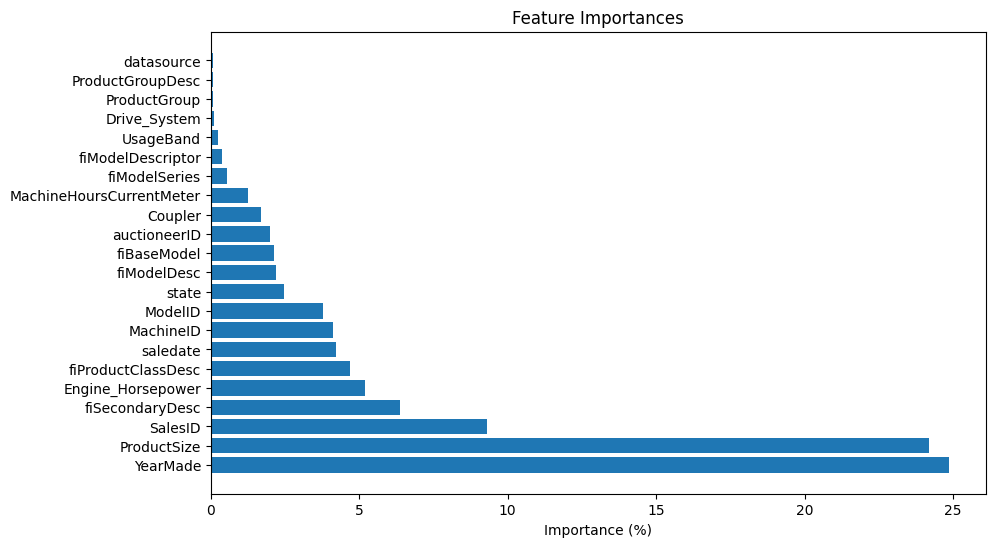

In [16]:
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np  # for sqrt function
import matplotlib.pyplot as plt  # for plotting

# Step 1: Upload the CSV file
df = pd.read_csv("Train.csv")



# Function to preprocess the data
def preprocess_data(X):
    # Convert categorical columns to category codes
    for col in X.columns:
        if X[col].dtype == 'object':  # If the column contains strings
            X[col] = X[col].astype('category')  # Convert to category type
        if X[col].dtype == 'category':  # If it's now a category dtype
            X[col] = X[col].cat.codes  # Convert category values to integer codes
    return X

# Step 2: Preprocessing (Assuming you have 'SalePrice' as the dependent variable)
columns_to_drop = list(df.columns[21:53])  # Columns from 20 to 50

# Remove column 31 and 38 from the columns_to_drop list
columns_to_drop.remove(df.columns[31])  # Remove column 31
columns_to_drop.remove(df.columns[38])  # Remove column 38

# Drop the selected columns (including 'SalePrice')
X = df.drop(columns=['SalePrice'] + columns_to_drop)
# Preprocess the features to convert categorical columns into numeric codes
X = preprocess_data(X)

# Step 3: Apply Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.05, n_estimators=100, random_state=42)  # Adjust contamination parameter as needed
outliers = iso_forest.fit_predict(X)
outliers = outliers == -1  # Mark outliers as True

# Filter out the outliers from the dataset
X_filtered = X[~outliers]
y_filtered = y[~outliers]

# Step 4: Train a Random Forest Regressor
# Split the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Step 6: Calculate RMSE for Train and Test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))  # RMSE for training data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))      # RMSE for test data

print(f'Root Mean Squared Error (RMSE) on Train Data: {rmse_train}')
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse_test}')

# Step 7: Get feature importances
importances = rf_regressor.feature_importances_

# Convert importances to percentages
importances_percentage = importances * 100

# Step 8: Create a DataFrame for easy viewing
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances_percentage
})

# Sort the DataFrame by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances as a table with percentages
print("\nFeature Importances (in %):")
print(importance_df)

# Optional: You can also plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel("Importance (%)")
plt.title("Feature Importances")
plt.show()


# Isolation forest and RandomForest regression :delete  col by names
(col 21-53) exluding 'Enclosure'," Hydraulics" and "Coupler_System"


<ipython-input-19-07b738b98b56>:9: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Train.csv")


Root Mean Squared Error (RMSE) on Train Data: 3742.6671158363083
Root Mean Squared Error (RMSE) on Test Data: 9845.836957099762

Feature Importances (in %):
                     Feature  Importance
5                   YearMade   24.650157
14               ProductSize   22.274263
0                    SalesID    8.664025
10               fiBaseModel    8.650222
11           fiSecondaryDesc    5.573715
1                  MachineID    3.957443
8                   saledate    3.798217
15        fiProductClassDesc    3.787476
2                    ModelID    3.441449
21            Coupler_System    3.021891
16                     state    2.337637
9                fiModelDesc    2.217187
20                Hydraulics    1.998099
4               auctioneerID    1.821266
19                 Enclosure    1.251644
6   MachineHoursCurrentMeter    1.221962
12             fiModelSeries    0.435639
13         fiModelDescriptor    0.376418
7                  UsageBand    0.227270
3                 datas

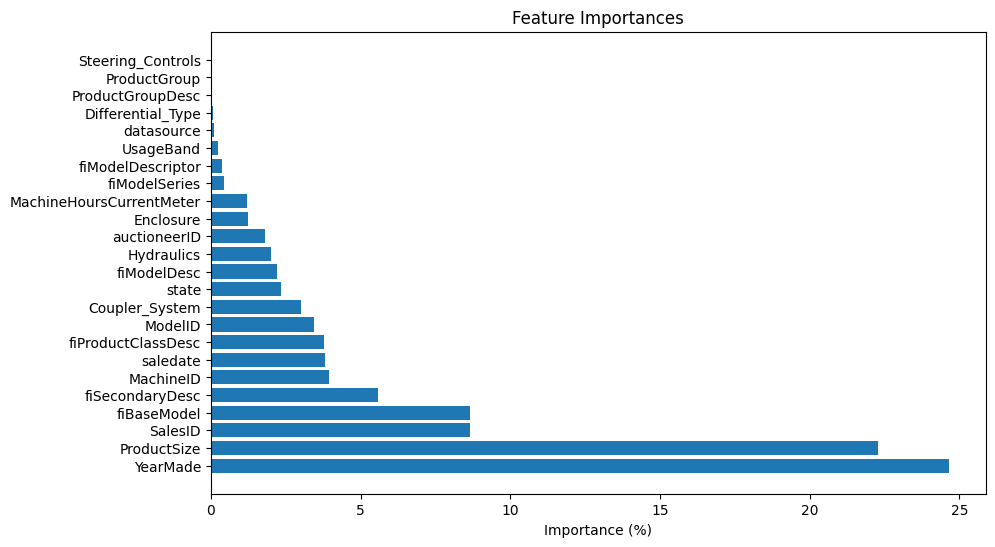

In [19]:
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np  # for sqrt function
import matplotlib.pyplot as plt  # for plotting

# Step 1: Upload the CSV file
df = pd.read_csv("Train.csv")

# Randomly drop half of the rows
df = df.sample(frac=0.5, random_state=42)  # frac=0.5 means we take 50% of the rows

# Function to preprocess the data
def preprocess_data(X):
    # Convert categorical columns to category codes
    for col in X.columns:
        if X[col].dtype == 'object':  # If the column contains strings
            X[col] = X[col].astype('category')  # Convert to category type
        if X[col].dtype == 'category':  # If it's now a category dtype
            X[col] = X[col].cat.codes  # Convert category values to integer codes
    return X

# Step 2: Preprocessing (Assuming you have 'SalePrice' as the dependent variable)
# Split data into features (X) and target (y)
X = df.drop(columns=['SalePrice','Drive_System',  'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls']
 )   # Adjust the columns to drop based on your dataset
y = df['SalePrice']

# Preprocess the features to convert categorical columns into numeric codes
X = preprocess_data(X)

# Step 3: Apply Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.05, n_estimators=100, random_state=42)  # Adjust contamination parameter as needed
outliers = iso_forest.fit_predict(X)
outliers = outliers == -1  # Mark outliers as True

# Filter out the outliers from the dataset
X_filtered = X[~outliers]
y_filtered = y[~outliers]

# Step 4: Train a Random Forest Regressor
# Split the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Step 6: Calculate RMSE for Train and Test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))  # RMSE for training data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))      # RMSE for test data

print(f'Root Mean Squared Error (RMSE) on Train Data: {rmse_train}')
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse_test}')

# Step 7: Get feature importances
importances = rf_regressor.feature_importances_

# Convert importances to percentages
importances_percentage = importances * 100

# Step 8: Create a DataFrame for easy viewing
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances_percentage
})

# Sort the DataFrame by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances as a table with percentages
print("\nFeature Importances (in %):")
print(importance_df)

# Optional: You can also plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel("Importance (%)")
plt.title("Feature Importances")
plt.show()


# removing all col under 1% according to the feature importance: RMSE was elevated in Tranin and similiar in Test

<ipython-input-20-c545a2e0a98b>:9: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Train.csv")


Root Mean Squared Error (RMSE) on Train Data: 3763.5121999906596
Root Mean Squared Error (RMSE) on Test Data: 10033.09681473632

Feature Importances (in %):
                     Feature  Importance
4                   YearMade   25.126847
10               ProductSize   22.498947
0                    SalesID    8.705605
8                fiBaseModel    8.659261
9            fiSecondaryDesc    5.182188
11        fiProductClassDesc    4.164785
1                  MachineID    4.040464
2                    ModelID    3.992413
6                   saledate    3.854095
15            Coupler_System    2.851605
12                     state    2.351831
7                fiModelDesc    2.308801
3               auctioneerID    1.839115
14                Hydraulics    1.801702
5   MachineHoursCurrentMeter    1.480261
13                 Enclosure    1.142081


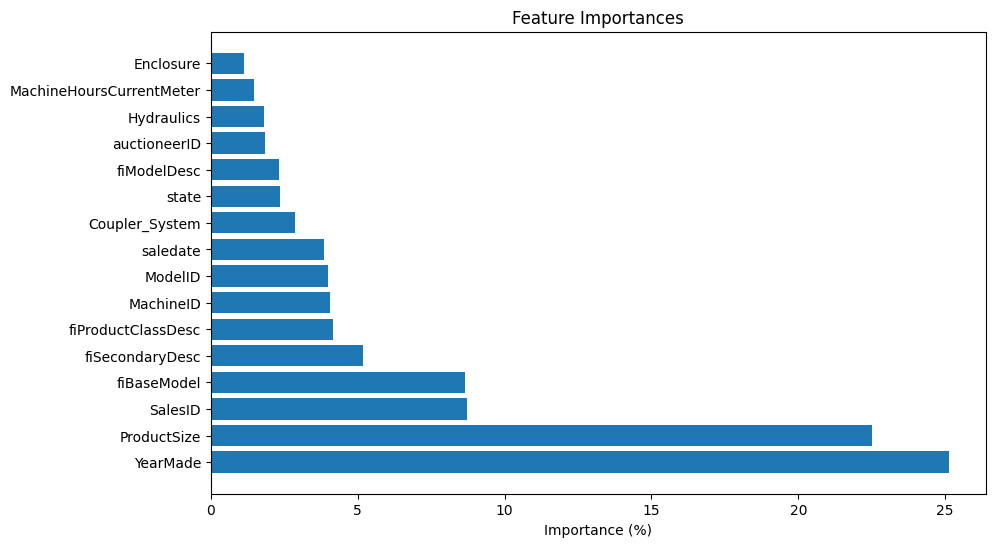

In [20]:
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np  # for sqrt function
import matplotlib.pyplot as plt  # for plotting

# Step 1: Upload the CSV file
df = pd.read_csv("Train.csv")

# Randomly drop half of the rows
df = df.sample(frac=0.5, random_state=42)  # frac=0.5 means we take 50% of the rows

# Function to preprocess the data
def preprocess_data(X):
    # Convert categorical columns to category codes
    for col in X.columns:
        if X[col].dtype == 'object':  # If the column contains strings
            X[col] = X[col].astype('category')  # Convert to category type
        if X[col].dtype == 'category':  # If it's now a category dtype
            X[col] = X[col].cat.codes  # Convert category values to integer codes
    return X

# Step 2: Preprocessing (Assuming you have 'SalePrice' as the dependent variable)
# Split data into features (X) and target (y)
X = df.drop(columns=['SalePrice','Drive_System','Steering_Controls','ProductGroup','ProductGroupDesc','Differential_Type','datasource','fiModelDescriptor','fiModelSeries', 'Forks','UsageBand','Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls']
 )   # Adjust the columns to drop based on your dataset
y = df['SalePrice']

# Preprocess the features to convert categorical columns into numeric codes
X = preprocess_data(X)

# Step 3: Apply Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.05, n_estimators=100, random_state=42)  # Adjust contamination parameter as needed
outliers = iso_forest.fit_predict(X)
outliers = outliers == -1  # Mark outliers as True

# Filter out the outliers from the dataset
X_filtered = X[~outliers]
y_filtered = y[~outliers]

# Step 4: Train a Random Forest Regressor
# Split the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Step 6: Calculate RMSE for Train and Test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))  # RMSE for training data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))      # RMSE for test data

print(f'Root Mean Squared Error (RMSE) on Train Data: {rmse_train}')
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse_test}')

# Step 7: Get feature importances
importances = rf_regressor.feature_importances_

# Convert importances to percentages
importances_percentage = importances * 100

# Step 8: Create a DataFrame for easy viewing
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances_percentage
})

# Sort the DataFrame by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances as a table with percentages
print("\nFeature Importances (in %):")
print(importance_df)

# Optional: You can also plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel("Importance (%)")
plt.title("Feature Importances")
plt.show()


# Isolation forest and RandomForest regression :delete half of the rows and col by name exluding " Hydraulics" and "Coupler_System"


<ipython-input-18-633acf5c4dae>:9: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Train.csv")


Root Mean Squared Error (RMSE) on Train Data: 3765.3708352952676
Root Mean Squared Error (RMSE) on Test Data: 9865.82585151067

Feature Importances (in %):
                     Feature  Importance
5                   YearMade   25.050386
14               ProductSize   21.954477
10               fiBaseModel    9.292148
0                    SalesID    8.871248
11           fiSecondaryDesc    4.930227
1                  MachineID    4.118955
15        fiProductClassDesc    3.970247
8                   saledate    3.956661
2                    ModelID    3.560923
20            Coupler_System    3.023693
16                     state    2.438898
9                fiModelDesc    2.175786
19                Hydraulics    2.070324
4               auctioneerID    1.895808
6   MachineHoursCurrentMeter    1.278160
12             fiModelSeries    0.459659
13         fiModelDescriptor    0.411000
7                  UsageBand    0.231147
3                 datasource    0.115672
21         Differential_

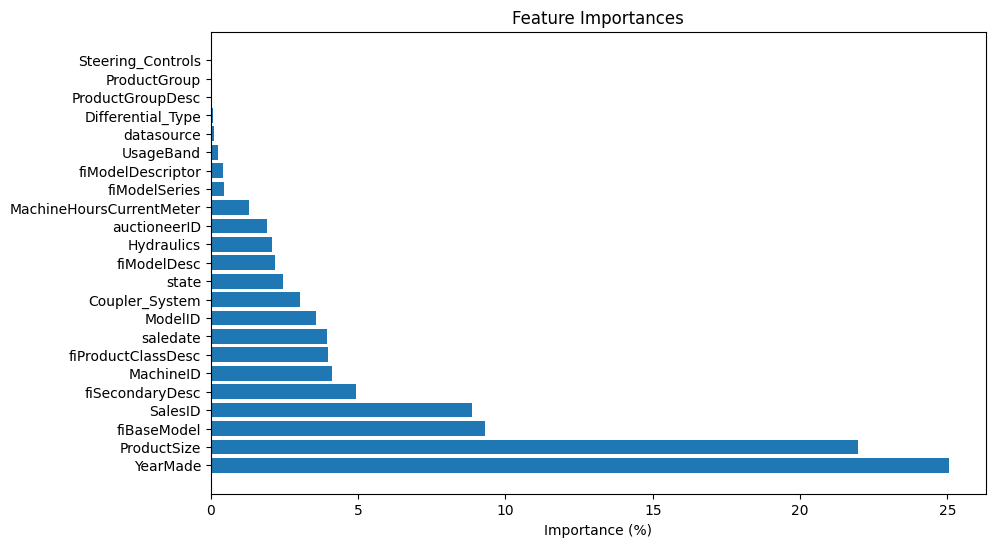

In [18]:
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np  # for sqrt function
import matplotlib.pyplot as plt  # for plotting

# Step 1: Upload the CSV file
df = pd.read_csv("Train.csv")

# Randomly drop half of the rows
df = df.sample(frac=0.5, random_state=42)  # frac=0.5 means we take 50% of the rows

# Function to preprocess the data
def preprocess_data(X):
    # Convert categorical columns to category codes
    for col in X.columns:
        if X[col].dtype == 'object':  # If the column contains strings
            X[col] = X[col].astype('category')  # Convert to category type
        if X[col].dtype == 'category':  # If it's now a category dtype
            X[col] = X[col].cat.codes  # Convert category values to integer codes
    return X

# Step 2: Preprocessing (Assuming you have 'SalePrice' as the dependent variable)
# Split data into features (X) and target (y)
X = df.drop(columns=['SalePrice','Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls']
 )   # Adjust the columns to drop based on your dataset
y = df['SalePrice']

# Preprocess the features to convert categorical columns into numeric codes
X = preprocess_data(X)

# Step 3: Apply Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.05, n_estimators=100, random_state=42)  # Adjust contamination parameter as needed
outliers = iso_forest.fit_predict(X)
outliers = outliers == -1  # Mark outliers as True

# Filter out the outliers from the dataset
X_filtered = X[~outliers]
y_filtered = y[~outliers]

# Step 4: Train a Random Forest Regressor
# Split the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Step 6: Calculate RMSE for Train and Test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))  # RMSE for training data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))      # RMSE for test data

print(f'Root Mean Squared Error (RMSE) on Train Data: {rmse_train}')
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse_test}')

# Step 7: Get feature importances
importances = rf_regressor.feature_importances_

# Convert importances to percentages
importances_percentage = importances * 100

# Step 8: Create a DataFrame for easy viewing
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances_percentage
})

# Sort the DataFrame by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances as a table with percentages
print("\nFeature Importances (in %):")
print(importance_df)

# Optional: You can also plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel("Importance (%)")
plt.title("Feature Importances")
plt.show()


# isolation forest and RandomForest Regressor - delete half of the rows and col 21-50 not 31 (according to the previous feature importance)

<ipython-input-13-e9b55fc0992c>:9: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Train.csv")


Root Mean Squared Error (RMSE) on Train Data: 3751.1538969310036
Root Mean Squared Error (RMSE) on Test Data: 9889.723699811197

Feature Importances (in %):
                     Feature  Importance
5                   YearMade   24.294540
14               ProductSize   23.423952
0                    SalesID    8.863171
11           fiSecondaryDesc    8.129625
20         Engine_Horsepower    5.709345
15        fiProductClassDesc    5.209125
1                  MachineID    4.232293
8                   saledate    4.098668
2                    ModelID    3.825747
16                     state    2.505437
9                fiModelDesc    2.303275
10               fiBaseModel    2.279315
4               auctioneerID    1.940659
6   MachineHoursCurrentMeter    1.307479
12             fiModelSeries    0.506850
13         fiModelDescriptor    0.447008
7                  UsageBand    0.236557
18          ProductGroupDesc    0.194084
17              ProductGroup    0.168527
3                 datas

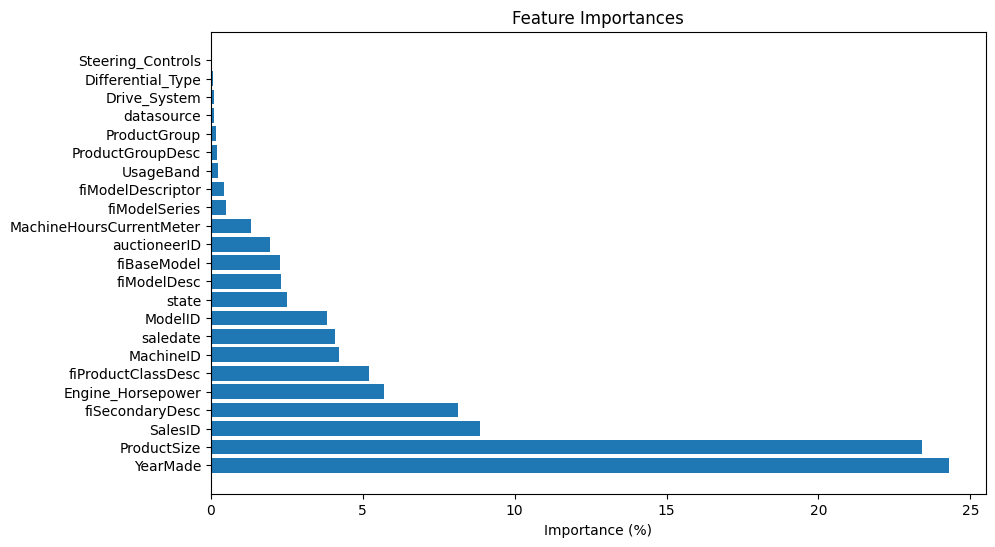

In [13]:
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np  # for sqrt function
import matplotlib.pyplot as plt  # for plotting

# Step 1: Upload the CSV file
df = pd.read_csv("Train.csv")

# Randomly drop half of the rows
df = df.sample(frac=0.5, random_state=42)  # frac=0.5 means we take 50% of the rows

# Function to preprocess the data
def preprocess_data(X):
    # Convert categorical columns to category codes
    for col in X.columns:
        if X[col].dtype == 'object':  # If the column contains strings
            X[col] = X[col].astype('category')  # Convert to category type
        if X[col].dtype == 'category':  # If it's now a category dtype
            X[col] = X[col].cat.codes  # Convert category values to integer codes
    return X
# Select the columns from index 21 to 50 (inclusive)
columns_to_drop = list(df.columns[21:53])  # Columns from 20 to 50

# Remove column 31 from the columns_to_drop list
columns_to_drop.remove(df.columns[31])  # Remove column 31

# Drop the selected columns (including 'SalePrice')
X = df.drop(columns=['SalePrice'] + columns_to_drop)

# Preprocess the features to convert categorical columns into numeric codes
X = preprocess_data(X)

# Step 3: Apply Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.05, n_estimators=100, random_state=42)  # Adjust contamination parameter as needed
outliers = iso_forest.fit_predict(X)
outliers = outliers == -1  # Mark outliers as True

# Filter out the outliers from the dataset
X_filtered = X[~outliers]
y_filtered = y[~outliers]

# Step 4: Train a Random Forest Regressor
# Split the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Step 6: Calculate RMSE for Train and Test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))  # RMSE for training data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))      # RMSE for test data

print(f'Root Mean Squared Error (RMSE) on Train Data: {rmse_train}')
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse_test}')

# Step 7: Get feature importances
importances = rf_regressor.feature_importances_

# Convert importances to percentages
importances_percentage = importances * 100

# Step 8: Create a DataFrame for easy viewing
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances_percentage
})

# Sort the DataFrame by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances as a table with percentages
print("\nFeature Importances (in %):")
print(importance_df)

# Optional: You can also plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel("Importance (%)")
plt.title("Feature Importances")
plt.show()
